In [ ]:
import cv2

In [ ]:
import requests

In [ ]:
from PIL import Image
image = Image.open('../img/6.jpg')
#image

In [ ]:
import PIL, numpy
pil_image = PIL.Image.open('../img/6.jpg').convert('RGB')
#print(pil_image)
open_cv_image = numpy.array(pil_image)
#print(open_cv_image)

In [ ]:
open_cv_image

In [ ]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [ ]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
cnts

In [ ]:
ary = []
for(c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if h == 31 or h == 32:
        ary.append((x,y,w,h))

In [ ]:
print(ary)

In [ ]:
%pylab inline
plt.imshow(open_cv_image)

In [ ]:
ary

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

In [ ]:
from matplotlib import pyplot as plt
import random

for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(('./prediction/'+str(random.randint(1,10000000))+'.jpg').format(id+1),dpi=100)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import numpy as np

In [ ]:
import PIL, numpy

basewidth = 50
pil_image = PIL.Image.open('./1/4.jpg').convert('1')
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS)
img

In [ ]:
%pylab inline
import os
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(0,10):
    for img in os.listdir('{}/'.format(i)):
        pil_image = PIL.Image.open('{}/{}'.format(i, img)).convert('1') 
    
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        
        ax = fig.add_subplot(20, 16, cnt+1, xticks=[], yticks=[])
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize = 20)        
        cnt = cnt + 1
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [ ]:
import numpy
digit_ary = numpy.array(digits)

In [ ]:
digit_ary.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 10000)
mlp.fit(X_scaled,labels)

In [ ]:
predicted = mlp.predict(X_scaled)

In [ ]:
predicted

In [ ]:
target = numpy.array(labels)
target

In [ ]:
predicted == target

In [ ]:
%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('./prediction/')):
    pil_image = PIL.Image.open('./prediction/{}'.format(img)).convert('1') 
    ax = fig.add_subplot(10, 12, idx+1, xticks=[], yticks=[])
    ax.imshow(pil_image,cmap=plt.cm.binary,interpolation='nearest')

In [ ]:
%pylab inline
import os
data = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for idx, img in enumerate(os.listdir('./prediction/')):
    pil_image = PIL.Image.open('./prediction/{}'.format(img)).convert('1') 
    
    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [ ]:
mlp.predict(data_scaled)

In [ ]:
from sklearn.externals import joblib
joblib.dump(mlp, './pkl/captcha.pkl')

In [ ]:
clf = joblib.load('./pkl/captcha.pkl')

In [ ]:
import requests
rs  = requests.session()

headers = {'user-agent': 'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
veriurl = 'https://portalx.yzu.edu.tw/PortalSocialVB/SelRandomImage.aspx?UID=WQBaADIAMAAyADAALwAwADcALwAxADAAcABvAHIAdABhAGwAeAA%3d'
res = rs.get('https://portalx.yzu.edu.tw/PortalSocialVB/Login.aspx', headers=headers)
with open('kaptcha.jpg', 'wb') as f:
    res2 = rs.get(veriurl, headers=headers)
    f.write(res2.content)

In [ ]:
from PIL import Image
Image.open('kaptcha.jpg')

In [ ]:
import requests
import numpy
from matplotlib import pyplot as plt
from datetime import datetime
import time
import cv2
from sklearn.preprocessing import StandardScaler
basewidth = 50
def saveKaptcha(image, dest):
    scaler = StandardScaler()
    pil_image = PIL.Image.open(image).convert('RGB') 
    open_cv_image = numpy.array(pil_image) 
    imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print((x,y,w,h))
        if h >= 30 and w < 30:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        #print(thresh)
        #print(os.path.join(dest, '{}.jpg'.format(idx)));
        plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [ ]:
saveKaptcha('kaptcha.jpg', 'tmp')

In [ ]:
def predictKaptcha(dest):
    data = []
    for idx, img in enumerate(os.listdir(dest)):
        pil_image = PIL.Image.open(os.path.join(dest,'{}'.format(img))).convert('1') 
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        data.append([pixel for pixel in iter(img.getdata())])
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    return clf.predict(data_scaled)

In [ ]:
predictKaptcha('tmp')

In [ ]:
import requests

rs  = requests.session()

headers = {'user-agent': 'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
veriurl = 'https://portalx.yzu.edu.tw/PortalSocialVB/SelRandomImage.aspx?UID=WQBaADIAMAAyADAALwAwADcALwAxADAAcABvAHIAdABhAGwAeAA%3d'
res = rs.get('https://portalx.yzu.edu.tw/PortalSocialVB/Login.aspx', headers=headers)
with open('kaptcha.jpg', 'wb') as f:
    res2 = rs.get(veriurl, headers=headers)
    f.write(res2.content)
saveKaptcha('kaptcha.jpg', 'tmp') 
kaptcha = predictKaptcha('tmp')

print(kaptcha)
Image.open('kaptcha.jpg')

正在初始化.....
train
saveKaptcha
(1, 1, 110, 43)
(1, 32, 3, 3)
(2, 40, 3, 3)
(4, 9, 3, 3)
(10, 20, 3, 3)
(11, 9, 22, 31)
(12, 38, 3, 3)
(12, 6, 3, 3)
(17, 13, 10, 22)
(21, 41, 3, 3)
(21, 8, 3, 3)
(24, 35, 1, 1)
(29, 18, 1, 1)
(32, 11, 3, 3)
(34, 9, 23, 31)
(45, 11, 2, 1)
(47, 36, 3, 3)
(48, 25, 3, 3)
(50, 21, 3, 3)
(51, 38, 3, 3)
(52, 11, 1, 1)
(52, 2, 3, 3)
(55, 9, 23, 31)
(56, 3, 3, 3)
(57, 39, 3, 3)
(58, 11, 3, 3)
(59, 35, 1, 1)
(61, 14, 10, 21)
(67, 16, 3, 3)
(72, 35, 3, 3)
(73, 1, 3, 3)
(74, 39, 3, 3)
(76, 19, 3, 3)
(77, 9, 21, 32)
(78, 20, 3, 3)
(80, 30, 1, 1)
(83, 25, 8, 10)
(84, 8, 3, 3)
(85, 14, 8, 8)
(87, 22, 1, 1)
(87, 11, 1, 1)
(92, 39, 3, 3)
(94, 16, 1, 1)
(95, 2, 3, 3)
(96, 10, 3, 3)
(97, 25, 3, 3)
(100, 26, 3, 3)
(100, 1, 3, 3)
(101, 36, 3, 3)
(101, 12, 3, 3)
(103, 36, 3, 3)
(103, 27, 3, 3)
(105, 26, 3, 3)
(106, 1, 3, 3)
(107, 12, 3, 3)
predictKaptcha
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0

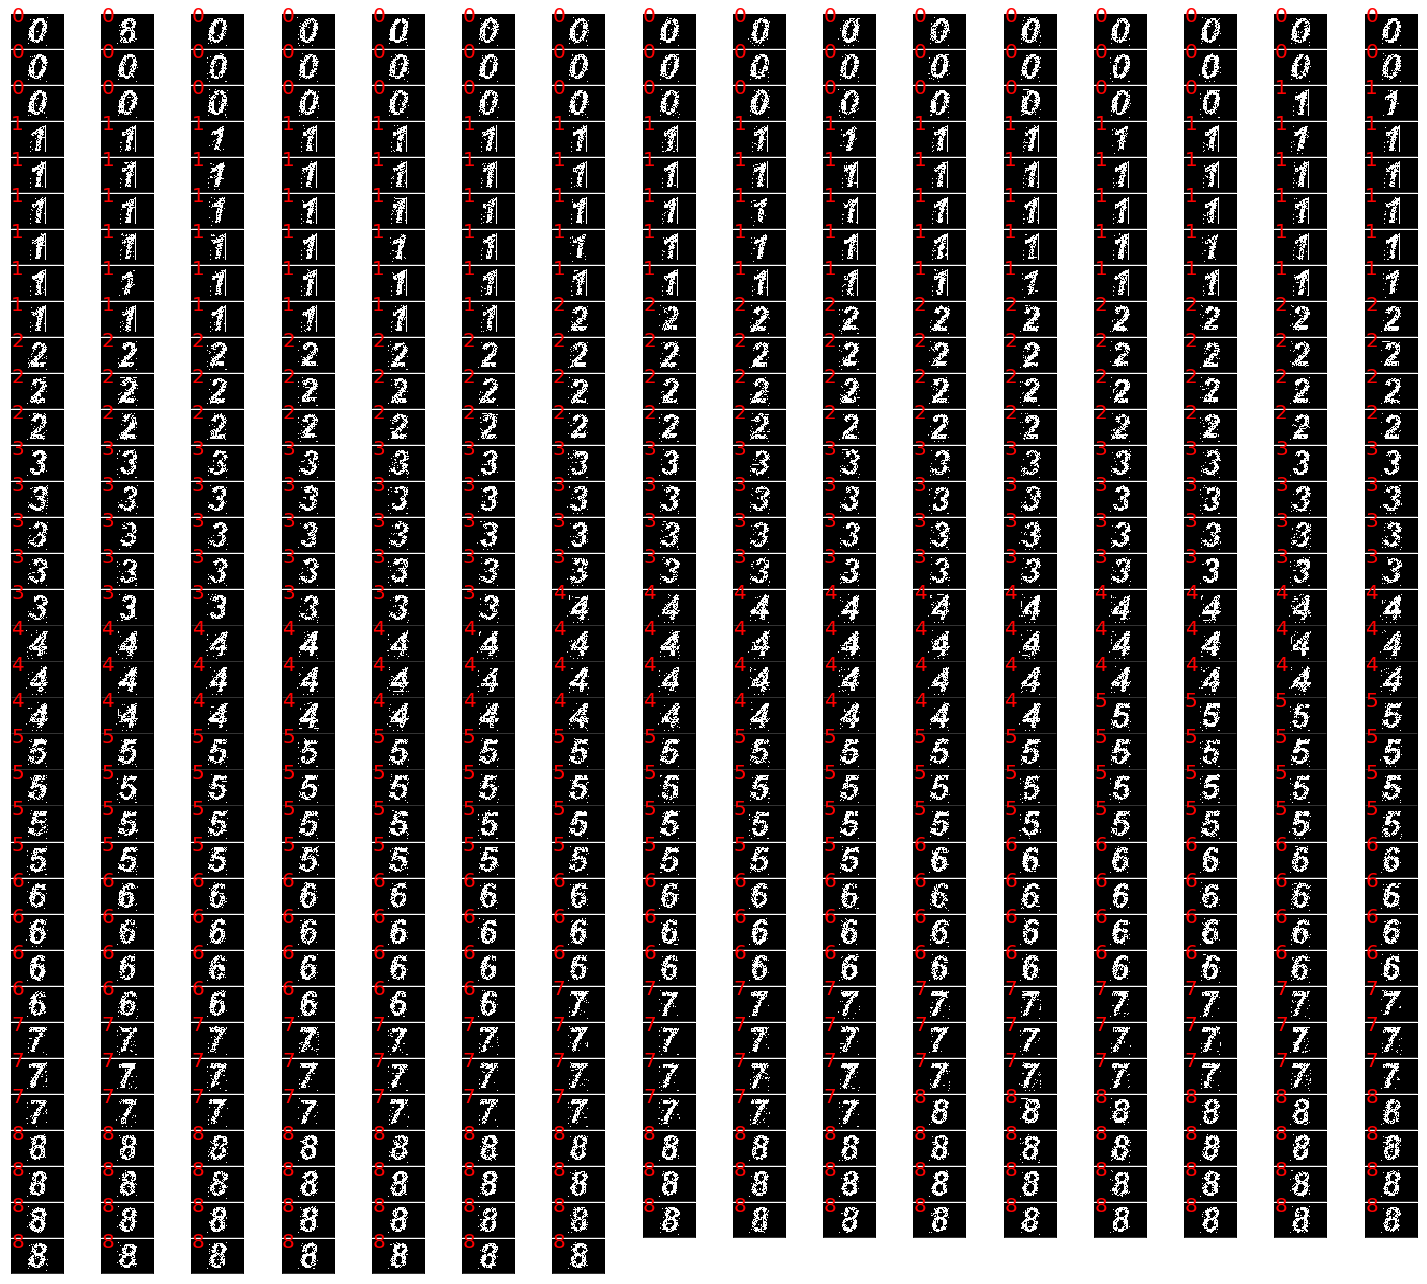

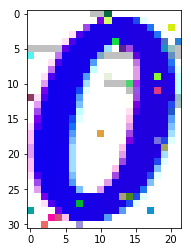

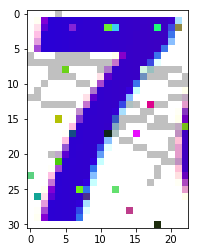

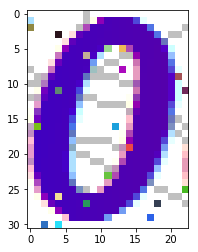

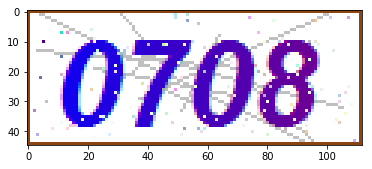

[0 3 5 1]
正確? 0
更正:0->0
更正:3->7
更正:5->0
更正:1->8
wait...
generateModel
train
saveKaptcha
(1, 1, 110, 43)
(2, 24, 3, 3)
(2, 14, 3, 3)
(3, 21, 3, 3)
(3, 16, 3, 3)
(5, 16, 3, 3)
(5, 14, 3, 3)
(6, 36, 3, 3)
(6, 22, 3, 3)
(9, 35, 3, 3)
(11, 9, 22, 31)
(16, 14, 11, 21)
(19, 31, 3, 3)
(20, 27, 3, 3)
(21, 6, 3, 3)
(26, 32, 1, 1)
(30, 37, 3, 3)
(30, 35, 3, 3)
(32, 9, 3, 3)
(34, 7, 22, 34)
(35, 15, 3, 3)
(37, 39, 3, 3)
(41, 3, 3, 3)
(43, 3, 3, 3)
(45, 34, 3, 3)
(47, 27, 3, 3)
(50, 32, 3, 3)
(52, 22, 3, 3)
(54, 31, 3, 3)
(57, 9, 17, 31)
(60, 24, 3, 3)
(60, 2, 3, 3)
(63, 39, 3, 3)
(63, 10, 3, 3)
(63, 16, 1, 1)
(68, 41, 3, 3)
(68, 37, 3, 3)
(70, 24, 3, 3)
(76, 9, 23, 31)
(78, 26, 3, 3)
(79, 40, 3, 3)
(79, 5, 3, 3)
(83, 29, 3, 3)
(86, 41, 3, 3)
(87, 27, 3, 3)
(89, 6, 3, 3)
(91, 25, 1, 1)
(92, 7, 3, 3)
(94, 2, 3, 3)
(95, 16, 1, 1)
(97, 33, 3, 3)
(97, 24, 3, 3)
(99, 23, 3, 3)
(102, 35, 3, 3)
(103, 7, 3, 3)
(104, 24, 3, 3)
(105, 4, 3, 3)
(105, 1, 3, 3)
(106, 23, 3, 3)
predictKaptcha
[[ 0.  0.  0. ...,  

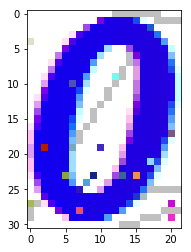

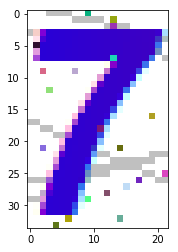

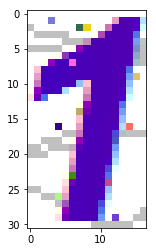

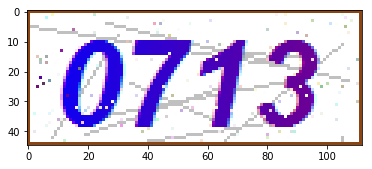

[0 7 1 3]
正確? 1
wait...
train
saveKaptcha
(1, 1, 110, 43)
(2, 18, 3, 3)
(5, 19, 4, 3)
(8, 38, 3, 3)
(11, 9, 22, 32)
(13, 12, 3, 3)
(15, 5, 3, 3)
(18, 22, 1, 1)
(21, 37, 1, 1)
(27, 19, 3, 3)
(30, 32, 3, 3)
(30, 20, 3, 3)
(32, 34, 3, 3)
(33, 35, 3, 3)
(34, 9, 22, 31)
(35, 18, 3, 3)
(41, 6, 3, 3)
(41, 4, 4, 3)
(48, 1, 3, 3)
(49, 26, 3, 3)
(50, 39, 3, 3)
(51, 28, 3, 3)
(53, 16, 3, 3)
(55, 40, 3, 3)
(57, 29, 3, 3)
(57, 9, 17, 31)
(59, 33, 3, 3)
(61, 9, 3, 3)
(72, 37, 3, 3)
(72, 16, 3, 3)
(73, 33, 3, 3)
(74, 38, 3, 3)
(74, 28, 3, 3)
(74, 6, 3, 3)
(75, 2, 3, 3)
(77, 9, 21, 31)
(77, 9, 3, 3)
(78, 5, 3, 3)
(81, 10, 3, 3)
(83, 25, 9, 10)
(84, 14, 9, 7)
(86, 40, 3, 3)
(86, 32, 3, 3)
(94, 8, 3, 3)
(96, 40, 3, 3)
(98, 15, 3, 3)
(98, 3, 3, 3)
(103, 27, 3, 3)
(105, 21, 3, 3)
predictKaptcha
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[5 7 1 8]


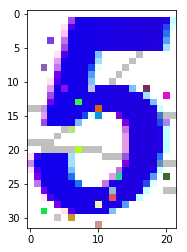

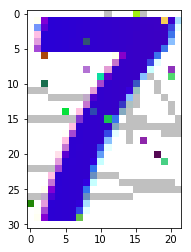

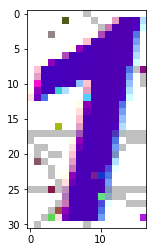

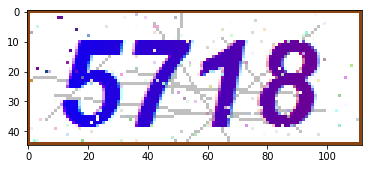

[5 7 1 8]
正確? 1
wait...
train
saveKaptcha
(1, 1, 110, 43)
(1, 23, 3, 3)
(1, 10, 3, 3)
(9, 22, 3, 3)
(10, 8, 3, 3)
(11, 9, 21, 31)
(12, 21, 3, 3)
(15, 5, 3, 3)
(20, 36, 1, 1)
(27, 17, 1, 1)
(28, 25, 3, 3)
(29, 35, 3, 3)
(30, 34, 3, 3)
(31, 21, 3, 3)
(33, 9, 22, 31)
(37, 23, 1, 1)
(39, 14, 10, 21)
(39, 32, 3, 3)
(40, 25, 3, 3)
(43, 16, 3, 3)
(45, 24, 3, 3)
(48, 7, 3, 3)
(50, 5, 3, 3)
(51, 38, 3, 3)
(51, 24, 1, 1)
(52, 19, 1, 1)
(55, 16, 3, 3)
(55, 8, 21, 32)
(56, 21, 3, 3)
(58, 2, 3, 3)
(60, 4, 3, 3)
(61, 25, 8, 11)
(63, 26, 3, 3)
(63, 23, 1, 1)
(63, 13, 8, 8)
(64, 3, 3, 3)
(65, 27, 3, 3)
(66, 38, 3, 3)
(67, 41, 3, 3)
(71, 40, 3, 3)
(76, 9, 3, 3)
(77, 4, 3, 3)
(78, 40, 3, 3)
(78, 25, 3, 3)
(78, 9, 22, 31)
(80, 2, 3, 3)
(89, 37, 3, 3)
(91, 30, 3, 3)
(93, 12, 1, 1)
(93, 6, 3, 3)
(94, 2, 3, 3)
(97, 24, 3, 3)
(101, 37, 3, 3)
predictKaptcha
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[2 0 8 7]


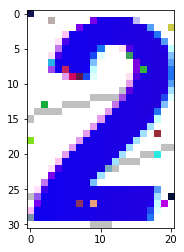

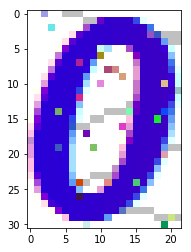

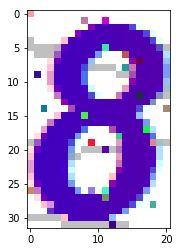

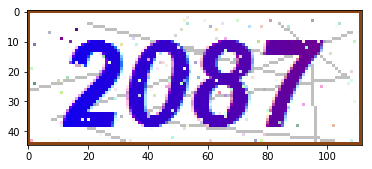

[2 0 8 7]
正確? 1
wait...
train
saveKaptcha
(1, 1, 110, 43)
(3, 17, 3, 3)
(6, 4, 3, 3)
(7, 13, 3, 3)
(9, 11, 3, 3)
(12, 9, 21, 31)
(14, 29, 1, 1)
(14, 4, 3, 3)
(17, 24, 8, 11)
(19, 39, 3, 3)
(19, 27, 3, 3)
(19, 2, 3, 3)
(26, 7, 3, 3)
(27, 19, 3, 3)
(27, 4, 3, 3)
(28, 6, 3, 3)
(30, 18, 3, 3)
(32, 15, 3, 3)
(32, 12, 3, 3)
(33, 9, 22, 31)
(35, 8, 3, 3)
(37, 23, 3, 3)
(38, 39, 3, 3)
(42, 15, 3, 3)
(44, 12, 1, 1)
(46, 37, 1, 1)
(48, 2, 3, 3)
(49, 27, 3, 3)
(49, 20, 1, 1)
(49, 5, 3, 3)
(51, 9, 3, 3)
(52, 32, 3, 3)
(53, 23, 3, 3)
(53, 18, 3, 3)
(54, 41, 3, 3)
(55, 16, 3, 3)
(55, 9, 21, 31)
(56, 7, 3, 3)
(58, 9, 3, 3)
(61, 25, 8, 10)
(63, 14, 8, 7)
(64, 37, 1, 1)
(70, 30, 1, 1)
(73, 35, 3, 3)
(73, 7, 3, 3)
(75, 37, 3, 3)
(75, 8, 3, 3)
(76, 26, 3, 3)
(77, 13, 3, 3)
(77, 8, 22, 32)
(79, 10, 3, 3)
(85, 39, 3, 3)
(91, 11, 1, 1)
(93, 37, 3, 3)
(95, 40, 3, 3)
(97, 39, 3, 3)
(97, 6, 3, 3)
(98, 27, 3, 3)
(98, 23, 3, 3)
(103, 34, 3, 3)
(104, 10, 3, 3)
(105, 12, 3, 3)
predictKaptcha
[[ 0.  0.  0. ...,  0.

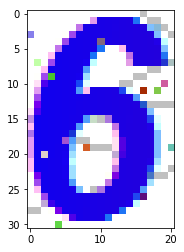

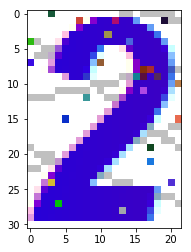

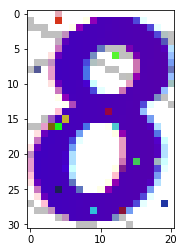

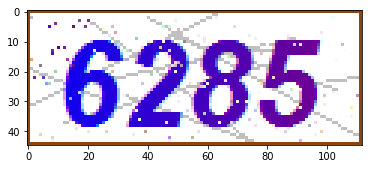

[6 2 8 5]
正確? 1
wait...
train
saveKaptcha
(1, 1, 110, 43)
(1, 34, 3, 3)
(2, 5, 3, 3)
(4, 26, 3, 4)
(4, 16, 3, 3)
(4, 9, 3, 3)
(5, 36, 3, 3)
(6, 26, 3, 3)
(7, 22, 3, 3)
(8, 2, 3, 3)
(12, 9, 21, 31)
(14, 10, 3, 3)
(14, 23, 1, 1)
(17, 24, 8, 11)
(17, 3, 3, 3)
(18, 4, 3, 3)
(19, 31, 3, 3)
(23, 21, 1, 1)
(25, 38, 3, 3)
(28, 5, 3, 3)
(31, 32, 3, 3)
(32, 10, 3, 3)
(32, 9, 23, 31)
(33, 26, 4, 3)
(34, 5, 3, 3)
(39, 40, 3, 3)
(40, 37, 1, 1)
(42, 22, 1, 1)
(48, 36, 3, 3)
(49, 5, 3, 3)
(50, 2, 3, 3)
(51, 38, 3, 3)
(53, 41, 3, 3)
(53, 9, 23, 31)
(54, 37, 3, 3)
(56, 16, 3, 3)
(58, 13, 3, 3)
(61, 20, 7, 9)
(63, 9, 3, 3)
(68, 18, 1, 1)
(69, 28, 1, 1)
(69, 16, 1, 1)
(71, 4, 3, 3)
(73, 40, 3, 3)
(74, 31, 3, 3)
(75, 28, 3, 3)
(75, 24, 3, 3)
(75, 12, 3, 3)
(76, 26, 3, 3)
(77, 12, 3, 3)
(78, 9, 22, 31)
(79, 17, 3, 3)
(86, 15, 3, 3)
(86, 6, 3, 3)
(88, 25, 1, 1)
(90, 32, 3, 3)
(93, 35, 3, 3)
(97, 17, 3, 3)
(98, 35, 3, 3)
(99, 25, 3, 3)
(100, 27, 3, 3)
(100, 9, 3, 4)
(101, 32, 3, 3)
(102, 20, 3, 3)
(102, 3, 3

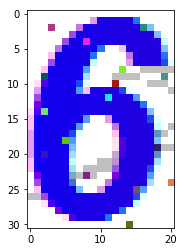

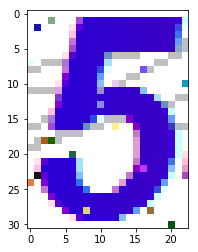

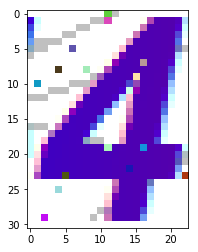

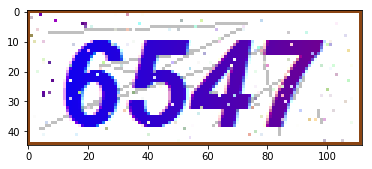

[6 5 4 7]
正確? 2


In [2]:
import matplotlib, requests, numpy, time, cv2, os, shutil, PIL, random
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib


basewidth = 50

#init-----------------------------
print('正在初始化.....')
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(0,10):
    for img in os.listdir('{}/'.format(i)):
        pil_image = PIL.Image.open('{}/{}'.format(i, img)).convert('1') 

        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

        ax = fig.add_subplot(40, 16, cnt+1, xticks=[], yticks=[])
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize = 20)        
        cnt = cnt + 1

        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)
digit_ary = numpy.array(digits)
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 10000)
mlp.fit(X_scaled,labels)
joblib.dump(mlp, './pkl/captcha.pkl')
clf = joblib.load('./pkl/captcha.pkl')
#end init--------------------------------

def savepkl():
    joblib.dump(mlp, './pkl/captcha.pkl')
def loadpkl():
    clf = joblib.load('./pkl/captcha.pkl')


def saveKaptcha(image, dest):
    print('saveKaptcha')
    scaler = StandardScaler()
    pil_image = PIL.Image.open(image).convert('RGB')
    open_cv_image = numpy.array(pil_image) 
    imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    aryall = []
    cnt = 0
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        print((x,y,w,h))
        if h >= 30 and w < 30:
            cnt = cnt + 1
            ary.append((x,y,w,h))
        aryall.append((x,y,w,h))
    if(cnt != 4):
        print(aryall)
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        #print(thresh)
        #print(os.path.join(dest, '{}.jpg'.format(idx)));
        plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

def predictKaptcha(dest):
    print('predictKaptcha')
    data = []
    for idx, img in enumerate(os.listdir(dest)):
        pil_image = PIL.Image.open(os.path.join(dest,'{}'.format(img))).convert('1') 
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
        data.append([pixel for pixel in iter(img.getdata())])
    scaler = StandardScaler()
    scaler.fit(data)
    data_scaled = scaler.transform(data)
    print(data_scaled)
    return clf.predict(data_scaled)

def train():
    print('train')
    rs  = requests.session()

    headers = {'user-agent': 'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
    
    veriurl = 'https://portalx.yzu.edu.tw/PortalSocialVB/SelRandomImage.aspx?UID=WQBaADIAMAAyADAALwAwADcALwAxADAAcABvAHIAdABhAGwAeAA%3d'
    res = rs.get('https://portalx.yzu.edu.tw/PortalSocialVB/Login.aspx', headers=headers)
    with open('kaptcha.jpg', 'wb') as f:
        res2 = rs.get(veriurl, headers=headers)
        f.write(res2.content)
    saveKaptcha('kaptcha.jpg', 'tmp') 
    kaptcha = predictKaptcha('tmp')

    print(kaptcha)
    return kaptcha

def generateModel():
    print('generateModel')
    digits = []
    labels = []
    basewidth = 50
    fig = plt.figure(figsize = (20,20))
    cnt = 0 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(0,10):
        for img in os.listdir('{}/'.format(i)):
            pil_image = PIL.Image.open('{}/{}'.format(i, img)).convert('1') 

            wpercent = (basewidth/float(pil_image.size[0]))
            hsize = int((float(pil_image.size[1])*float(wpercent)))
            img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

            ax = fig.add_subplot(40, 16, cnt+1, xticks=[], yticks=[])
            ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
            ax.text(0, 7, str(i), color="red", fontsize = 20)        
            cnt = cnt + 1

            digits.append([pixel for pixel in iter(img.getdata())])
            labels.append(i)
    digit_ary = numpy.array(digits)
    scaler = StandardScaler()
    scaler.fit(digit_ary)
    X_scaled = scaler.transform(digit_ary)
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 10000)
    mlp.fit(X_scaled,labels)

 
    

#generateModel()
#savepkl()
#loadpkl()
while True:
    kap = train()
    imgplot = plt.imshow(matplotlib.image.imread('kaptcha.jpg'))
    plt.ion()
    plt.show()
    print(kap)
    correct = input("正確? ")
    if correct == '1':
        print('wait...')
        ran = str(random.randint(1,10000000))
        for i in range(0,4):
            os.rename(os.path.join('tmp', str(i)+'.jpg'), os.path.join('tmp', ran+str(i)+'.jpg'))
            shutil.move('./tmp/'+ran+str(i)+'.jpg','./'+str(kap[i]))
        #generateModel()
        #savepkl()
        #loadpkl()
    elif correct == '0':
        kap[0]=input("更正:"+str(kap[0])+"->")
        kap[1]=input("更正:"+str(kap[1])+"->")
        kap[2]=input("更正:"+str(kap[2])+"->")
        kap[3]=input("更正:"+str(kap[3])+"->")
        print('wait...')
        ran = str(random.randint(1,10000000))
        for i in range(0,4):
            os.rename(os.path.join('tmp', str(i)+'.jpg'), os.path.join('tmp', ran+str(i)+'.jpg'))
            shutil.move('./tmp/'+ran+str(i)+'.jpg','./'+str(kap[i]))
        generateModel()
        savepkl()
        loadpkl()
    elif correct == '2':
        break
    plt.close()